<a href="https://colab.research.google.com/github/burakerdgn/GoogleColab/blob/main/keras_deneme_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Connection to Google Drive***


In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive



In [ ]:
!google-drive-ocamlfuse drive

In [ ]:
import sys
sys.path.insert(0,'drive/Colab_workspace')

In [ ]:
cd drive/Colab_workspace/

/content/drive/Colab_workspace


In [ ]:
!pip install -q keras
import keras


In [ ]:
!ls

DATA		      ngrok-stable-linux-amd64.zip
keras_deneme1.ipynb   pratik-derin-ogrenme-uygulamalari
keras_deneme_2.ipynb  rakam_tanima_CNN_MNIST_Keras.py
keras-mnist-tutorial  tb_logs
ngrok


## ***Bank Data Project***

In [ ]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('DATA/bank_note_data.txt',delimiter=',')
data

In [ ]:
labels = data[:,4]
labels

In [ ]:
features = data [:,0:4]
features

In [ ]:
X = features
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_object = MinMaxScaler()

In [ ]:
scaler_object.fit(X_train)

In [ ]:
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
model = Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))

In [ ]:
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(scaled_X_train,y_train,epochs=50,verbose=2)

In [ ]:
 abc = model.predict_classes(scaled_X_test)

In [ ]:
model.metrics_names

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,model.predict_classes(scaled_X_test))

## ***KERAS CNN WITH MNIST***

---




In [ ]:
from keras.datasets import mnist

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_test.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [ ]:
y_train

In [ ]:
from keras.utils.np_utils import  to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
x_train.shape

In [ ]:
model.fit(x_train,y_cat_train,epochs=5)

In [ ]:
x_test.shape

In [ ]:
y_cat_test.shape

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import  classification_report

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

## ***KERAS CNN WITH CIFAR-10***

---



In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
x_train.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow(x_train[12005])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_test.shape

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Repeat Convolutional and pooling layer

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer (Neuron number muust be 2^x)

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10,batch_size=25)

In [ ]:
model.evaluate(x_test,y_cat_test,batch_size=1)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

print(classification_report(y_test,predictions))

## ***Fashion MNIST Project***

---



**Load Data**

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

**Visualize the Data**

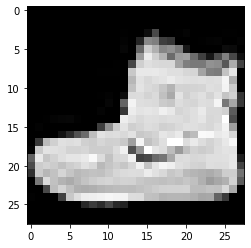

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
single_image = x_train[0]
plt.imshow(single_image,cmap='gray')


**Preprocessing the Data (Normalize the X train and X test by dividing by the max value of the image arrays**

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

**Add 4. dimension to X arrays**


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

**Convert Y arrays into one-hot encoded for categorical analysis by Keras**

In [ ]:
from keras.utils.np_utils import  to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

### **Build the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer

model.add(Dense(128,activation='relu'))   # 128 --> Neurons' number (optional for any value which is 2^x)

model.add(Dense(10,activation='softmax')) # 10 --> (class number)

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


**Train the set**

In [ ]:
model.fit(x_train,y_cat_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5360 - accuracy: 0.8101
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2856 - accuracy: 0.8980
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402 - accuracy: 0.9145
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2129 - accuracy: 0.9252
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1964 - accuracy: 0.9292


In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9064


[0.2718176245689392, 0.9064000248908997]

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.86      0.85      1000
           3       0.95      0.87      0.91      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
import numpy as np
from keras.preprocessing import image

one_image = x_test[6:2:2]
one_image.shape

(0, 28, 28, 1)

**Test Single Image**

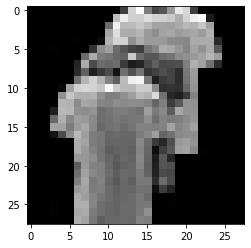

In [ ]:
array1 =  x_test[8420,:,:,0]
plt.imshow(array1,cmap='gray')

In [ ]:
array1 = np.expand_dims(array1,axis=(0,3))
array1.shape

(1, 28, 28, 1)

In [ ]:
model.predict_classes(array1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

# ***YOLO PROJECT***

In [ ]:
cd DATA/06-YOLOv3/

/content/drive/Colab_workspace/DATA/06-YOLOv3


In [ ]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO

In [ ]:
def process_image(img):

      image = cv2.resize(img, (416, 416),
                          interpolation=cv2.INTER_CUBIC)
      image = np.array(image, dtype='float32')
      image /= 255.
      image = np.expand_dims(image, axis=0)
      return image

In [ ]:
def get_classes(file):

        with open(file) as f:
           class_names = f.readlines()
        class_names = [c.strip() for c in class_names]

        return class_names

In [ ]:
def draw(image, boxes, scores, classes, all_classes):
   
        for box, score, cl in zip(boxes, scores, classes):
            x, y, w, h = box
   
            top = max(0, np.floor(x + 0.5).astype(int))
            left = max(0, np.floor(y + 0.5).astype(int))
            right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
            bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))
    
            cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
            cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                       (top, left - 6),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (0, 0, 255), 1,
                        cv2.LINE_AA)
    
            print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
            print('box coordinate x,y,w,h: {0}'.format(box))
    
        print()

In [ ]:
def detect_image(image, yolo, all_classes):
   
        pimage = process_image(image)
  
        start = time.time()
        boxes, classes, scores = yolo.predict(pimage, image.shape)
        end = time.time()
   
        print('time: {0:.2f}s'.format(end - start))
    
        if boxes is not None:
            draw(image, boxes, scores, classes, all_classes)
    
        return image

In [ ]:
 def detect_video(video, yolo, all_classes):
 
        video_path = os.path.join("videos", "test", video)
        camera = cv2.VideoCapture(video_path)
        cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)
  
        # Prepare for saving the detected video\n",
        sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
            int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        fourcc = cv2.VideoWriter_fourcc(*'mpeg')
 
        vout = cv2.VideoWriter()
        vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)
    
        while True:
            res, frame = camera.read()
    
            if not res:
                break
  
            image = detect_image(frame, yolo, all_classes)
            cv2.imshow("detection", image)
  
            # Save the video frame by frame
            vout.write(image)
    
            if cv2.waitKey(110) & 0xff == 27:
                    break
  
        vout.release()  
        camera.release()
    

In [ ]:
yolo = YOLO(0.6,0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

***Detecting Images***

In [ ]:
f = 'images/photo1.jpg'
image = cv2.imread(f)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/photo1_detected.jpg',image)


time: 31.14s
class: person, score: 0.99
box coordinate x,y,w,h: [203.84439826  66.64711142 100.21853447 210.87221336]
class: person, score: 0.88
box coordinate x,y,w,h: [422.88118601  86.06504011  53.96313965 148.27685761]
class: person, score: 0.70
box coordinate x,y,w,h: [387.61651516  80.25743079  52.08951235 160.3105607 ]
class: car, score: 1.00
box coordinate x,y,w,h: [ -6.70309365  89.40106821 216.0769105  138.94352341]



True

***Detect Video***

In [ ]:
## detect video one at a time in videos/test folder
# video = 'library1.mp4'
#detect_video(video,yolo, all_classes)

# ***Open Camera***

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **CapStone Project**

In [ ]:
import cv2
import numpy as np

from sklearn.metrics import pairwise

In [ ]:
background = None

accumulated_weight = 0.5

roi_top = 20
roi_bottom = 300
roi_right = 300
roi_left = 600


In [ ]:
def calc_accum_avg(frame,accumulated_weight):

  global background

  if background is none:
    background = frame.copy().astype('float')
    return None
  
  cv2.accumulateWeighted(frame,background,accumulated_weight)

In [ ]:
def segment(frame,threshold=25):

  diff = cv2.absdiff(background.astype('uint8'),frame)

  ret,thresholded = cv2.threshold(diff,threshold_min,255,cv2.THRESH_BINARY)

  image,contours,hierarchy = cv2.findContours(thresholded.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) == 0:
    return None

  else:
     hand_segment = max(contours,key=cv2.contourArea)

     return(thresholded,hand_segment)

In [ ]:
def count_fingers(thresholded,hand_segment):

  conv_hull =cv2.convexHull(hand_segment)

  top = tuple(conv_hull[conv_hull[:,:,1].argmin()[0]])
  bottom = tuple(conv_hull[conv_hull[:,:,1].argmax()[0]])
  left = tuple(conv_hull[conv_hull[:,:,0].argmin()[0]])
  right = tuple(conv_hull[conv_hull[:,:,0].argmax()[0]])

  cX = (left[0] + right[0]) // 2
  cY = (top[1] + bottom[1]) // 2

  distance = pairwase.euclidean_distances([cX,cY], Y=[left,right,top,bottom])[0]

  max_distance = distance.max()

  radius = int(0.9*max_distancce)
  circumfrence = (2*np.pi*radius)

  circular_roi = np.zeros(thresholded[:,2],dtype='uint8')

  cv2.circle(circular_roi,(cX,cY),radius,255,10)

  circular_roi = cv2.bitwise_and(thresholded, thresholded, mask=circular_roi)

  image, contours, hierarchy = cv2.findContours(circular_roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  count = 0

  for cnt in contours:
 
          (x, y, w, h) = cv2.boundingRect(cnt)
  
          out_of_wrist = ((cY + (cY * 0.25)) > (y + h))
          # 2. Number of points along the contour does not exceed 25% of the circumference of the circular ROI (otherwise we're counting points off the hand)\n",
          limit_points = ((circumference * 0.25) > cnt.shape[0]) 
           
          if  out_of_wrist and limit_points:
                count += 1
    
  return count


In [ ]:
#cam = cv2.VideoCapture(0)

num_frames = 0

while True:
   
        ret, frame = cam.read()
  
        frame = cv2.flip(frame, 1)
    
        frame_copy = frame.copy()
   
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        if num_frames < 60:
           calc_accum_avg(gray, accumulated_weight)

           if num_frames <= 59:
                cv2.putText(frame_copy, "WAIT! GETTING BACKGROUND AVG.", (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                cv2.imshow("Finger Count",frame_copy)
        else:
            hand = segment(gray)
  
            if hand is not None:

                thresholded, hand_segment = hand
  
                cv2.drawContours(frame_copy, [hand_segment + (roi_right, roi_top)], -1, (255, 0, 0),1)
 
                fingers = count_fingers(thresholded, hand_segment)
  
                cv2.putText(frame_copy, str(fingers), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

                cv2.imshow("Thesholded", thresholded)


        cv2.rectangle(frame_copy, (roi_left, roi_top), (roi_right, roi_bottom), (0,0,255), 5)
        num_frames += 1

        cv2.imshow("Finger Count", frame_copy)

        k = cv2.waitKey(1) & 0xFF

        if k == 27:
            break

cam.release()
cv2.destroyAllWindows()


AttributeError: ignored